# Sample Model

https://ipython-books.github.io/81-getting-started-with-scikit-learn/

1) First, let's make all the necessary imports:

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

2) We now define a deterministic nonlinear function underlying our generative model:

In [2]:
def f(x):
    return np.exp(3 * x)

3) We generate the values along the curve on [0,2].

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

4) Now, let's generate data points within [0,1]. We use the function f and we add some Gaussian noise.

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 2 * np.random.randn(len(x))

5) Let's plot our data points on [0,1].

Text(0.5, 1.0, 'Generative model')

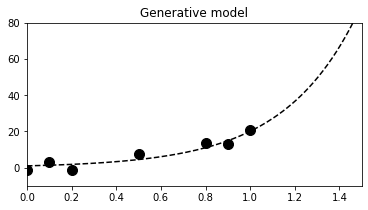

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

In the image, the dotted curve represents the generative model.

6) Now, we use scikit-learn to fit a linear model to the data. There are three steps. First, we create the model (an instance of the LinearRegression class). Then, we fit the model to our data. Finally, we predict values from our trained model.

In [6]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

We need to convert x and x_tr to column vectors, as it is a general convention in scikit-learn that observations are rows, while features are columns. Here, we have seven observations with one feature.

7)  We now plot the result of the trained linear model. We obtain a regression line in green here:

Text(0.5, 1.0, 'Linear regression')

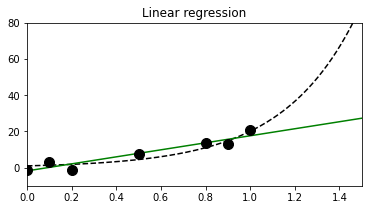

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

8)  The linear fit is not well-adapted here, as the data points are generated according to a nonlinear model (an exponential curve). Therefore, we are now going to fit a nonlinear model. More precisely, we will fit a polynomial function to our data points. We can still use linear regression for this, by precomputing the exponents of our data points. This is done by generating a Vandermonde matrix, using the np.vander() function. We will explain this trick in How it works.... In the following code, we perform and plot the fit:

Coefficients, degree 2:
	 12.97 6.41 0.00
Coefficients, degree 5:
	 1674.00 -4069.68 3370.20 -1061.54 108.91 0.00


Text(0.5, 1.0, 'Linear regression')

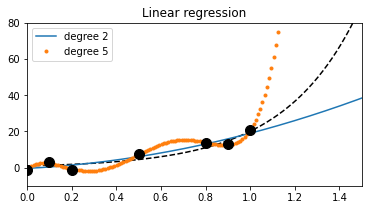

In [8]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")